<a href="https://colab.research.google.com/github/utkarsh0702/Tensorflow/blob/master/tensorflow7_cats_vs_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
from tensorflow import keras
import zipfile
from google.colab import files

In [0]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
local_zip= '/content/dogs_cats_sample_1000.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:
train_cats_dir= os.path.join('/content/dogs_cats_sample_1000/train/cats')
train_dogs_dir= os.path.join('/content/dogs_cats_sample_1000/train/dogs')
test_cats_dir= os.path.join('/content/dogs_cats_sample_1000/valid/cats')
test_dogs_dir= os.path.join('/content/dogs_cats_sample_1000/valid/dogs')

In [0]:
print('Total train cats images: ',len(os.listdir(train_cats_dir)))
print('Total train dogs images: ',len(os.listdir(train_dogs_dir)))
print('Total test cats images: ',len(os.listdir(test_cats_dir)))
print('Total test dogs images: ',len(os.listdir(test_dogs_dir)))

Total train cats images:  1000
Total train dogs images:  1000
Total test cats images:  1002
Total test dogs images:  998


In [0]:
model= keras.Sequential([
    keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(300,300,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)            

In [0]:
from tensorflow.keras.optimizers import RMSprop

#compiling the model
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale= 1./255)
train_gen= train_datagen.flow_from_directory( '/content/dogs_cats_sample_1000/train',
                                            target_size=(300,300),
                                            batch_size=20,
                                            class_mode='binary')

test_datagen= ImageDataGenerator(rescale= 1./255)
test_gen= test_datagen.flow_from_directory( '/content/dogs_cats_sample_1000/valid',
                                            target_size=(300,300),
                                            batch_size=20,
                                            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
history= model.fit_generator( train_gen,
                   steps_per_epoch=50,
                   epochs=15,
                   validation_data= test_gen,
                   validation_steps= 50,
                   verbose=2 )

Epoch 1/15
50/50 - 14s - loss: 2.1049 - acc: 0.5650 - val_loss: 0.6741 - val_acc: 0.6270
Epoch 2/15
50/50 - 9s - loss: 0.7351 - acc: 0.5700 - val_loss: 0.6664 - val_acc: 0.5590
Epoch 3/15
50/50 - 9s - loss: 0.7229 - acc: 0.6250 - val_loss: 0.7006 - val_acc: 0.5440
Epoch 4/15
50/50 - 9s - loss: 0.6183 - acc: 0.6510 - val_loss: 0.8445 - val_acc: 0.5050
Epoch 5/15
50/50 - 9s - loss: 0.6064 - acc: 0.7000 - val_loss: 0.6544 - val_acc: 0.6320
Epoch 6/15
50/50 - 9s - loss: 0.6081 - acc: 0.6950 - val_loss: 0.5848 - val_acc: 0.6870
Epoch 7/15
50/50 - 9s - loss: 0.4496 - acc: 0.7910 - val_loss: 0.5908 - val_acc: 0.6930
Epoch 8/15
50/50 - 9s - loss: 0.4675 - acc: 0.7950 - val_loss: 0.8486 - val_acc: 0.6380
Epoch 9/15
50/50 - 9s - loss: 0.3205 - acc: 0.8650 - val_loss: 0.8568 - val_acc: 0.6520
Epoch 10/15
50/50 - 9s - loss: 0.3493 - acc: 0.8530 - val_loss: 0.9503 - val_acc: 0.6690
Epoch 11/15
50/50 - 9s - loss: 0.2009 - acc: 0.9280 - val_loss: 0.9586 - val_acc: 0.7000
Epoch 12/15
50/50 - 9s - loss

In [0]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Prediction on unknown images

Saving animals-cats-cute-45170-min-1024x569.jpg to animals-cats-cute-45170-min-1024x569.jpg
Saving download (1).jpg to download (1).jpg
Saving download (2).jpg to download (2).jpg
Saving download (3).jpg to download (3).jpg
Saving download.jpg to download.jpg
Saving kitten-440379.jpg to kitten-440379.jpg


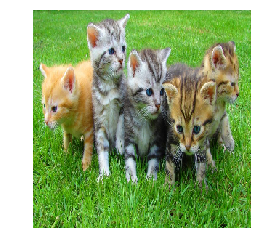

[1.]
The image is of a cat


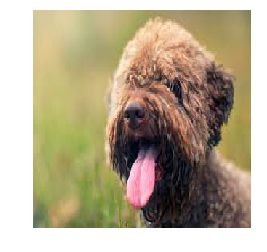

[1.]
The image is of a cat


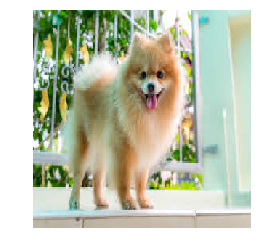

[1.]
The image is of a cat


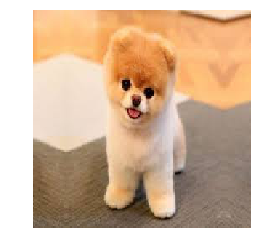

[0.]
The image is of a dog


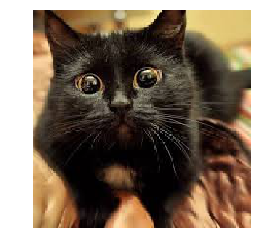

[0.]
The image is of a dog


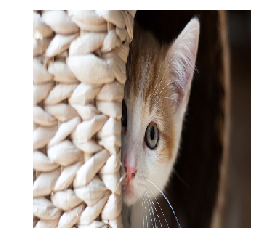

[0.]
The image is of a dog


In [0]:
uploaded= files.upload()

for fn in uploaded.keys():
  # predict image
  path='/content/' + fn
  img= image.load_img(path, target_size=(300,300))
  plt.axis('off')
  plt.imshow(img)
  plt.show()
  x= image.img_to_array(img)
  x= np.expand_dims(x, axis=0)
  
  images= np.vstack([x])
  classes= model.predict(images, batch_size=10)
  print(classes[0])
  if(classes[0]>0.5):
    print('The image is of a cat')
    
  else:
    print('The image is of a dog')
  

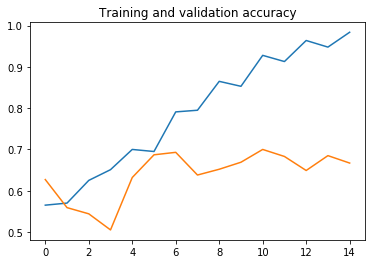

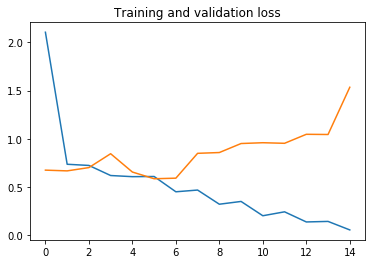

In [0]:
acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.show()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.show()